In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pprint

# Application Records Dataset

In [2]:
application_records = pd.read_csv("Datasets/application_record.csv", index_col=0)

In [3]:
application_records.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
# Display the dimensionality of application_records DataFrame
application_records.shape

(438557, 17)

In [5]:
# Detect missing values in application_records DataFrame
application_records.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
application_records.reset_index(inplace=True)

In [7]:
application_records.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
#Check application_records DataFrame for duplicate records
application_records = application_records.drop_duplicates('ID', keep='last')

In [9]:
# Replace Null values
application_records['OCCUPATION_TYPE'].fillna('Other', inplace=True)

In [10]:
application_records.shape

(438510, 18)

In [11]:
application_records.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [12]:
application_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [13]:
application_records.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385100e+05,438510.000000,4.385100e+05,438510.000000,438510.000000,438510.0,438510.000000,438510.000000,438510.000000,438510.000000
mean,6.022035e+06,0.427393,1.875209e+05,-15997.815984,60562.020955,1.0,0.206134,0.287763,0.108203,2.194463
std,5.714962e+05,0.724887,1.100807e+05,4185.058074,138766.410761,0.0,0.404529,0.452721,0.310637,0.897210
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609362e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047720e+06,0.000000,1.611000e+05,-15630.000000,-1468.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.454161e+06,1.000000,2.250000e+05,-12513.250000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


## Categorical Columns

### Simplifying categorical data

In [14]:
# View data to simplify
categoricals = pd.DataFrame(application_records.dtypes =='object').reset_index()
object_type = categoricals[categoricals[0] == True]['index']
object_type

1             CODE_GENDER
2            FLAG_OWN_CAR
3         FLAG_OWN_REALTY
6        NAME_INCOME_TYPE
7     NAME_EDUCATION_TYPE
8      NAME_FAMILY_STATUS
9       NAME_HOUSING_TYPE
16        OCCUPATION_TYPE
Name: index, dtype: object

In [15]:
application_records[ 'NAME_INCOME_TYPE'].value_counts()

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [16]:
application_records[ 'NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [17]:
# Change Academic and Higher education to Tertiary Education
application_records['NAME_EDUCATION_TYPE'].replace({'Higher education' : 'Tertiary education', 'Academic degree' :'Tertiary education'}, inplace=True)


In [18]:
application_records[ 'NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301789
Tertiary education               117821
Incomplete higher                 14849
Lower secondary                    4051
Name: NAME_EDUCATION_TYPE, dtype: int64

In [19]:
application_records[ 'NAME_FAMILY_STATUS'].value_counts()

Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64

In [20]:
application_records['NAME_FAMILY_STATUS'].replace({'Civil marriage':'Married'}, inplace=True)

In [21]:
application_records[ 'NAME_FAMILY_STATUS'].value_counts()

Married                 336322
Single / not married     55268
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64

In [22]:
application_records[ 'NAME_HOUSING_TYPE'].value_counts()

House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [23]:
application_records[ 'OCCUPATION_TYPE'].value_counts()

Other                    134187
Laborers                  78234
Core staff                43000
Sales staff               41096
Managers                  35483
Drivers                   26085
High skill tech staff     17287
Accountants               15982
Medicine staff            13520
Cooking staff              8074
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
application_records['OCCUPATION_TYPE'].replace(['Cleaning staff', 'Drivers', 'Laborers', 'Low-skill Laborers', 'Security staff'] , 'Labourer', inplace=True)
application_records['OCCUPATION_TYPE'].replace(['Accountants', 'Core staff', 'HR staff', 'Private service staff', 'Secretaries', 'Managers'] , 'Admin', inplace=True)
application_records['OCCUPATION_TYPE'].replace(['Waiters/barmen staff','Cooking staff'], 'Hospitality', inplace=True)
application_records['OCCUPATION_TYPE'].replace(['Realty agents', 'Sales staff'], 'Sales', inplace=True)
application_records['OCCUPATION_TYPE'].replace(['High skill tech staff', 'IT staff', 'Medicine staff'], 'STEM', inplace=True)

In [25]:
application_records[ 'OCCUPATION_TYPE'].value_counts()

Other          134187
Labourer       120297
Admin          100739
Sales           42137
STEM            31411
Hospitality      9739
Name: OCCUPATION_TYPE, dtype: int64

### Label Encode

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

mapping_dict={}

for x in application_records:
    if application_records[x].dtypes=='object':
        application_records[x] = label_encoder.fit_transform(application_records[x])
        le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        mapping_dict[x]=le_name_mapping

In [29]:
application_records.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,3,0,4,-12005,-4542,1,1,0,0,3,2.0
1,5008805,1,1,1,0,427500.0,4,3,0,4,-12005,-4542,1,1,0,0,3,2.0
2,5008806,1,1,1,0,112500.0,4,2,0,1,-21474,-1134,1,0,0,0,2,2.0
3,5008808,0,0,1,0,270000.0,0,2,2,1,-19110,-3051,1,0,1,1,5,1.0
4,5008809,0,0,1,0,270000.0,0,2,2,1,-19110,-3051,1,0,1,1,5,1.0


In [30]:
print(mapping_dict)

{'FLAG_OWN_CAR': {'N': 0, 'Y': 1}, 'FLAG_OWN_REALTY': {'N': 0, 'Y': 1}, 'NAME_INCOME_TYPE': {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}, 'NAME_EDUCATION_TYPE': {'Incomplete higher': 0, 'Lower secondary': 1, 'Secondary / secondary special': 2, 'Tertiary education': 3}, 'NAME_FAMILY_STATUS': {'Married': 0, 'Separated': 1, 'Single / not married': 2, 'Widow': 3}, 'NAME_HOUSING_TYPE': {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}, 'OCCUPATION_TYPE': {'Admin': 0, 'Hospitality': 1, 'Labourer': 2, 'Other': 3, 'STEM': 4, 'Sales': 5}}


In [31]:
mapping_dict.keys()

dict_keys(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [39]:
for key1, key1_info in mapping_dict.items():
    for key2 in key1_info:
        key1_info[key2] = int(key1_info[key2])

print(mapping_dict)

{'FLAG_OWN_CAR': {'N': 0, 'Y': 1}, 'FLAG_OWN_REALTY': {'N': 0, 'Y': 1}, 'NAME_INCOME_TYPE': {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}, 'NAME_EDUCATION_TYPE': {'Incomplete higher': 0, 'Lower secondary': 1, 'Secondary / secondary special': 2, 'Tertiary education': 3}, 'NAME_FAMILY_STATUS': {'Married': 0, 'Separated': 1, 'Single / not married': 2, 'Widow': 3}, 'NAME_HOUSING_TYPE': {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}, 'OCCUPATION_TYPE': {'Admin': 0, 'Hospitality': 1, 'Labourer': 2, 'Other': 3, 'STEM': 4, 'Sales': 5}}


In [48]:
pprint.pprint(mapping_dict)

{'FLAG_OWN_CAR': {'N': 0, 'Y': 1},
 'FLAG_OWN_REALTY': {'N': 0, 'Y': 1},
 'NAME_EDUCATION_TYPE': {'Incomplete higher': 0,
                         'Lower secondary': 1,
                         'Secondary / secondary special': 2,
                         'Tertiary education': 3},
 'NAME_FAMILY_STATUS': {'Married': 0,
                        'Separated': 1,
                        'Single / not married': 2,
                        'Widow': 3},
 'NAME_HOUSING_TYPE': {'Co-op apartment': 0,
                       'House / apartment': 1,
                       'Municipal apartment': 2,
                       'Office apartment': 3,
                       'Rented apartment': 4,
                       'With parents': 5},
 'NAME_INCOME_TYPE': {'Commercial associate': 0,
                      'Pensioner': 1,
                      'State servant': 2,
                      'Student': 3,
                      'Working': 4},
 'OCCUPATION_TYPE': {'Admin': 0,
                     'Hospitality': 1,
   

In [49]:
# # Save JSON file as txt for reference
# with open('Datasets/mapping_dict.txt', 'w') as outfile:
#     json.dump(mapping_dict, outfile)

### Testing for Outliers

In [76]:
numerical_columns = []

for x in application_records:
    if (application_records[x].dtype == 'int64') | (application_records[x].dtype == 'float64'):
        numerical_columns.append(x)

print(numerical_columns)

['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'MONTHS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS']


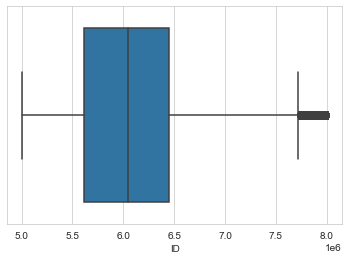

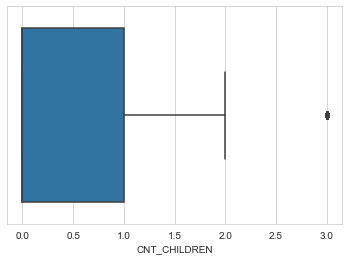

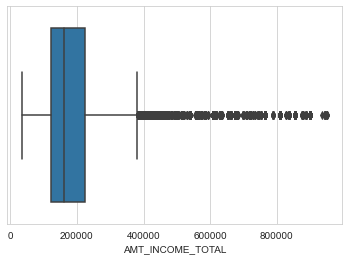

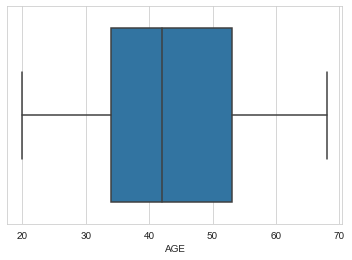

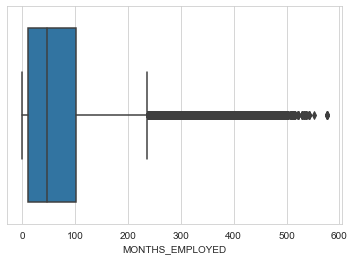

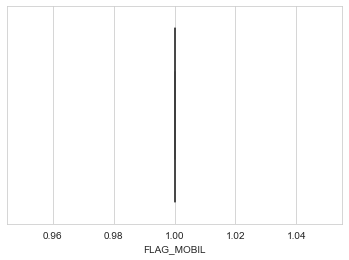

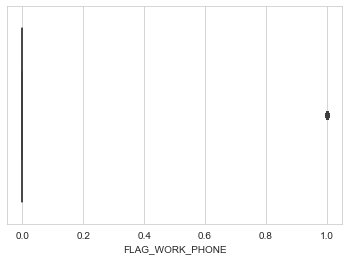

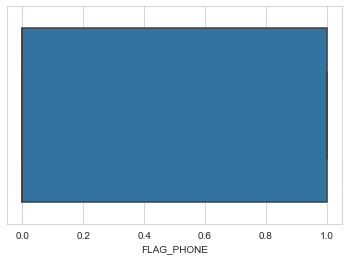

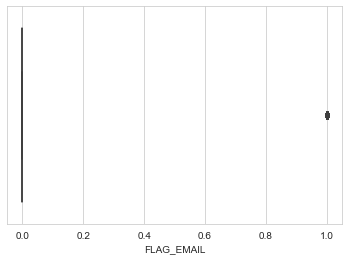

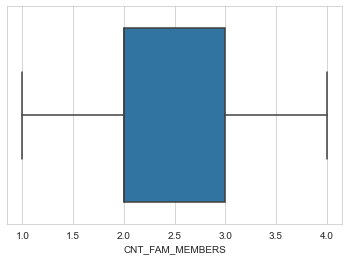

In [77]:
sns.set_style("whitegrid")

for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=application_records[col])

##### Outliers were detected in 
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS


In [78]:
# FOR CNT_CHILDREN COLUMN
q_hi = application_records['CNT_CHILDREN'].quantile(0.999)
application_records = application_records[(application_records['CNT_CHILDREN']<q_hi)]

In [79]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = application_records['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = application_records['AMT_INCOME_TOTAL'].quantile(0.001)
application_records = application_records[(application_records['AMT_INCOME_TOTAL']<q_hi) & (application_records['AMT_INCOME_TOTAL']>q_low)]

In [80]:
# FOR CNT_FAM_MEMBERS COLUMN
q_hi = application_records['CNT_FAM_MEMBERS'].quantile(0.999)
application_records = application_records[(application_records['CNT_FAM_MEMBERS']<q_hi)]

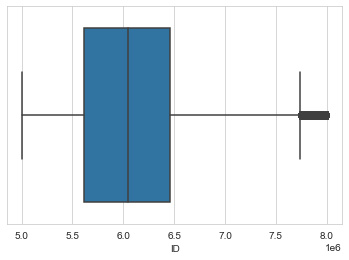

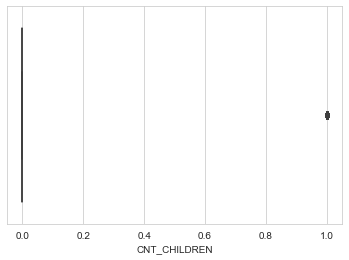

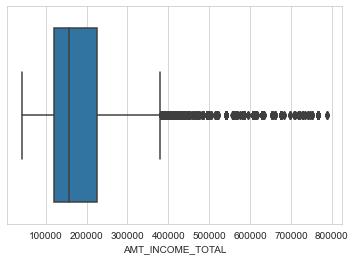

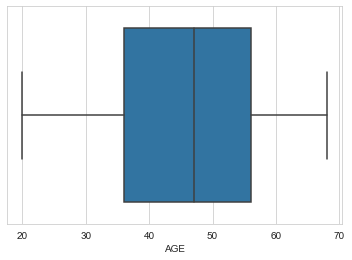

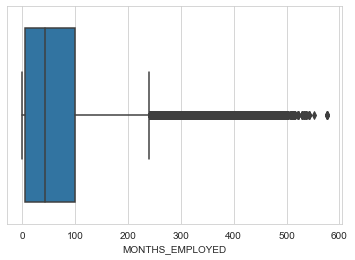

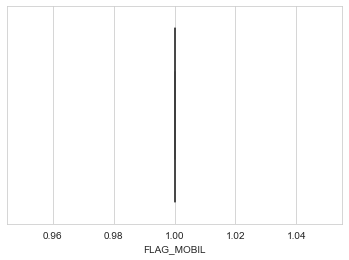

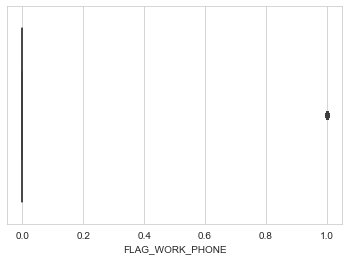

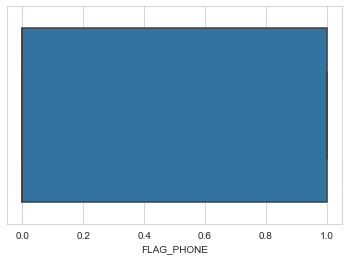

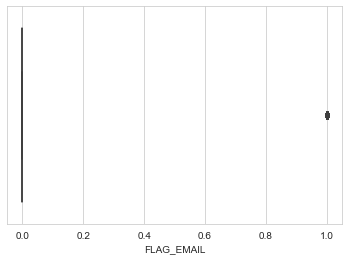

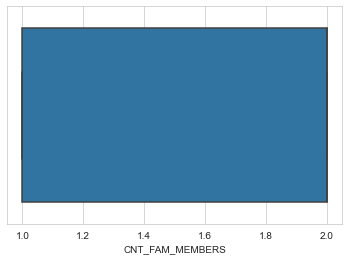

In [81]:
# Check if outliers have been resolved
sns.set_style("whitegrid")

for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=application_records[col])

In [82]:
application_records.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0
1,5008805,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0
2,5008806,1,1,1,0,112500.0,4,2,0,1,58,37,1,0,0,0,2,2.0
3,5008808,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0
4,5008809,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0
5,5008810,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0
6,5008811,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0
7,5008812,0,0,1,0,283500.0,1,3,1,1,61,0,1,0,0,0,3,1.0
8,5008813,0,0,1,0,283500.0,1,3,1,1,61,0,1,0,0,0,3,1.0
9,5008814,0,0,1,0,283500.0,1,3,1,1,61,0,1,0,0,0,3,1.0


In [83]:
application_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316787 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   316787 non-null  int64  
 1   CODE_GENDER          316787 non-null  int32  
 2   FLAG_OWN_CAR         316787 non-null  int32  
 3   FLAG_OWN_REALTY      316787 non-null  int32  
 4   CNT_CHILDREN         316787 non-null  int64  
 5   AMT_INCOME_TOTAL     316787 non-null  float64
 6   NAME_INCOME_TYPE     316787 non-null  int32  
 7   NAME_EDUCATION_TYPE  316787 non-null  int32  
 8   NAME_FAMILY_STATUS   316787 non-null  int32  
 9   NAME_HOUSING_TYPE    316787 non-null  int32  
 10  AGE                  316787 non-null  int64  
 11  MONTHS_EMPLOYED      316787 non-null  int64  
 12  FLAG_MOBIL           316787 non-null  int64  
 13  FLAG_WORK_PHONE      316787 non-null  int64  
 14  FLAG_PHONE           316787 non-null  int64  
 15  FLAG_EMAIL       

##### Convert DAYS_BIRTH into AGE and DAYS_EMPLOYED into MONTHS_EMPLOYED (positive integers)

In [84]:
application_records['DAYS_BIRTH'] = application_records.DAYS_BIRTH.apply(lambda x: abs(int(-x / 365.25)))
application_records['DAYS_EMPLOYED'] = application_records.DAYS_EMPLOYED.apply(lambda x: int(-x/30.42))

AttributeError: 'DataFrame' object has no attribute 'DAYS_BIRTH'

In [ ]:
# Negative DAYS_EMPLOYED is UNEMPLOYED after running above code, thus replace it by 0
application_records.loc[application_records['DAYS_EMPLOYED'] < 0, "DAYS_EMPLOYED"] = 0

In [ ]:
# Rename DAYS_BIRTH to AGE
application_records = application_records.rename(columns={"DAYS_BIRTH": "AGE"})
application_records = application_records.rename(columns={"DAYS_EMPLOYED": "MONTHS_EMPLOYED"})

In [ ]:
application_records.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0
1,5008805,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0
2,5008806,1,1,1,0,112500.0,4,2,0,1,58,37,1,0,0,0,2,2.0
3,5008808,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0
4,5008809,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0


In [42]:
application_records.to_csv("Datasets/application_record_cleaned.csv")

# Credit Records Dataset

In [43]:
credit_records = pd.read_csv("Datasets/credit_record.csv", index_col=0)

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [44]:
credit_records.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


In [45]:
credit_records['MONTHS_FROM_TODAY'] = credit_records['MONTHS_BALANCE']*-1
credit_records = credit_records.sort_values(['ID','MONTHS_FROM_TODAY'], ascending=True)
credit_records.head(10)

,MONTHS_BALANCE,STATUS,MONTHS_FROM_TODAY
ID,,,
5001711,0,X,0
5001711,-1,0,1
5001711,-2,0,2
5001711,-3,0,3
5001712,0,C,0
5001712,-1,C,1
5001712,-2,C,2
5001712,-3,C,3
5001712,-4,C,4


In [46]:
# Replace X, and C in Status column with 0
credit_records["STATUS"].replace({'X' : 0, 'C': 0 }, inplace=True)
credit_records["STATUS"] = credit_records["STATUS"].astype('int')
credit_records["STATUS"] = credit_records["STATUS"].apply(lambda x:1 if x >= 2 else 0)


In [47]:
credit_records.head(10)

,MONTHS_BALANCE,STATUS,MONTHS_FROM_TODAY
ID,,,
5001711,0,0,0
5001711,-1,0,1
5001711,-2,0,2
5001711,-3,0,3
5001712,0,0,0
5001712,-1,0,1
5001712,-2,0,2
5001712,-3,0,3
5001712,-4,0,4


In [48]:
credit_records = credit_records.groupby('ID').agg(max).reset_index()
credit_records.head(10)

,ID,MONTHS_BALANCE,STATUS,MONTHS_FROM_TODAY
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59
5,5001717,0,0,21
6,5001718,0,0,38
7,5001719,0,0,42
8,5001720,0,0,35
9,5001723,0,0,30


In [49]:
credit_records = credit_records[['ID', 'STATUS', 'MONTHS_FROM_TODAY']]
credit_records.head(10)

,ID,STATUS,MONTHS_FROM_TODAY
0,5001711,0,3
1,5001712,0,18
2,5001713,0,21
3,5001714,0,14
4,5001715,0,59
5,5001717,0,21
6,5001718,0,38
7,5001719,0,42
8,5001720,0,35
9,5001723,0,30


In [50]:
# Save into new csv
credit_records.to_csv("Datasets/credit_records_cleaned.csv")

### Combining the two new files

In [51]:
combined_df = application_records.join(credit_records.set_index('ID'), on='ID', how='inner')
combined_df.drop(['MONTHS_FROM_TODAY'], axis=1, inplace=True)
combined_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0,0
1,5008805,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0,0
2,5008806,1,1,1,0,112500.0,4,2,0,1,58,37,1,0,0,0,2,2.0,0
3,5008808,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0,0
4,5008809,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0,0


In [52]:
# Save into new csv
combined_df.to_csv("Datasets/combined_dataset.csv")